<a href="https://colab.research.google.com/github/NathanielCogneaux/NLP-comparison-between-Naive-Bayes-RNN-LSTM-and-Transformers/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the Sentiment Analysis for Financial News DataSet: FinancialPhraseBank (Available on Hugging Face)
!pip install datasets

# https://huggingface.co/datasets/financial_phrasebank
# 0 is negative
# 1 is positive
# 2 is neutral
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank", "sentences_allagree")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Distribution of the data among the labels')

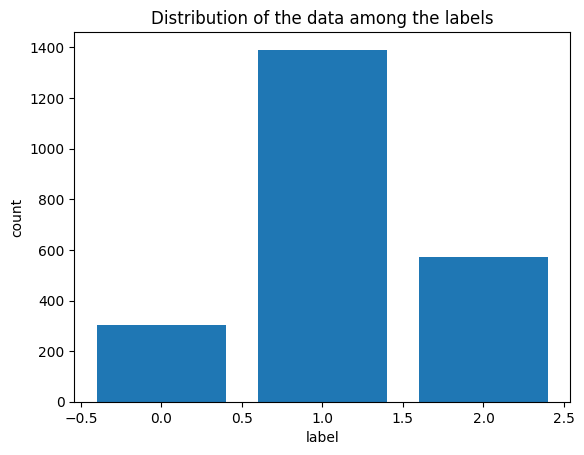

In [19]:
!pip uninstall pandas -Y
!pip install "pandas<2.0.0"
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

df = pd.DataFrame(dataset["train"])

df.head()

df_distrib = df["label"].value_counts()
plt.bar(df_distrib.index, df_distrib.values)
plt.xlabel("label")
plt.ylabel("count")
plt.title("Distribution of the data among the labels")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 399.5, 199.5, -0.5)

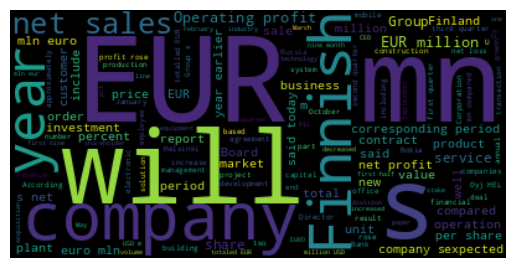

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(dataset["train"]["sentence"])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

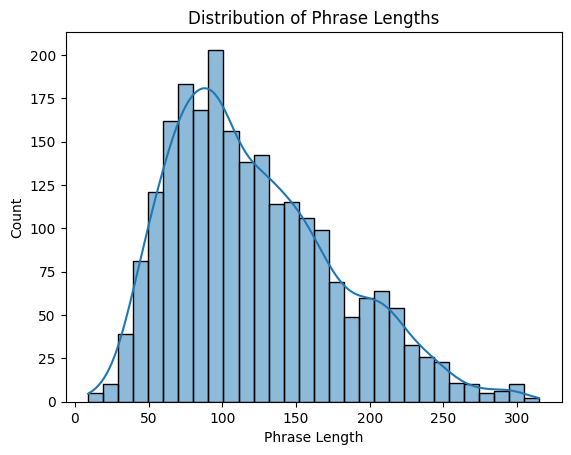

In [ ]:
import seaborn as sns

phrase_length = pd.DataFrame(data=dataset["train"]).apply(lambda x : len(x["sentence"]), axis=1)
sns.histplot(phrase_length, bins=30, kde=True)
plt.title('Distribution of Phrase Lengths')
plt.xlabel('Phrase Length')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

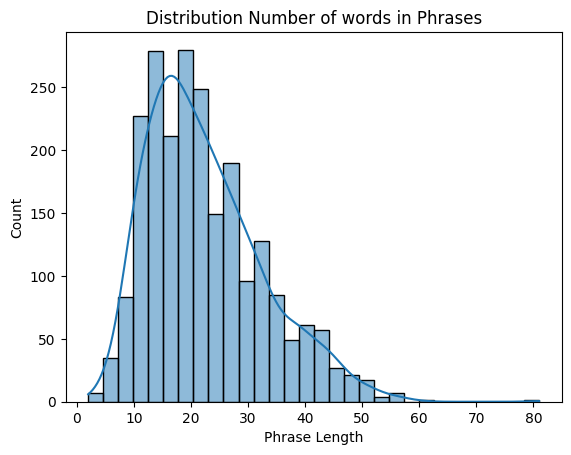

In [ ]:
number_words = pd.DataFrame(data=dataset["train"]).apply(lambda x : len(x["sentence"].split(" ")), axis=1)
sns.histplot(number_words, bins=30, kde=True)
plt.title('Distribution Number of words in Phrases')
plt.xlabel('Phrase Length')
plt.show()

In [ ]:
!pip install nltk
!pip install pyLDAvis

import gensim
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

documents = [sample['sentence'] for sample in dataset['train']]

# Prétraitement des documents : tokenization, suppression des stopwords et création du corpus
stop_words = set(stopwords.words('english'))
texts = []

for document in documents:
    tokens = word_tokenize(document.lower())  # Tokenization et mise en minuscules
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Suppression des stopwords et de la ponctuation
    texts.append(filtered_tokens)

# Création du modèle LDA avec Gensim
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Visualisation avec pyLDAvis
pyLDAvis.enable_notebook()
lda_vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [29]:
# data prepocessing
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

en_stopwords = set(stopwords.words("english"))

def preporcessing(sentence):
  sentence = sentence.lower() # Remove caps
  sentence = re.sub(r"[^a-z\s]", "", sentence) # Remove everything that is not a letter or a space !! Removing numbers and % (assumption: words are enough to classify)

  # Remove stop words
  sentence = word_tokenize(sentence)
  sentence = [word for word in sentence if word not in en_stopwords]

  # lemmatization
  sentence = [WordNetLemmatizer().lemmatize(word) for word in sentence]

  return " ".join(sentence)


for i in range(len(df["sentence"])):
  df["sentence"][i] = preporcessing(df["sentence"][i])

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-29-53f9fa1ddfd5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"][i] = preporcessing(df["sentence"][i])


,sentence,label
0,according gran company plan move production ru...,1
1,last quarter componenta net sale doubled eurm ...,2
2,third quarter net sale increased eur mn operat...,2
3,operating profit rose eur mn eur mn correspond...,2
4,operating profit totalled eur mn eur mn repres...,2


In [ ]:
# Our model

In [30]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
seed = 123

def tokenize(dataset):
  return tokenizer(dataset["sentence"])

new_dataset = dataset.map(tokenize, batched = True)["train"].shuffle(seed)
length = len(new_dataset)

train, test = new_dataset.select(range(int(0.8*length))), new_dataset.select(range(int(0.8*length), length))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
